## Cross-validation of sparse CCA

Predict expression of methylotrophy genes from methanotrophy genes.  Previously pooled on species.

First, run: ../notebooks/prepare_data/prepare_X_m_expression_Y_nmm_expression_Xval.ipynb

That fills /Users/janet/ML_meta-omics/data/cross_val_data

In [1]:
import sys
assert sys.version_info.major == 2, "python version is {}".format(sys.version_info.major)
print(sys.version)

2.7.12 |Anaconda 4.2.0 (64-bit)| (default, Jun 29 2016, 11:07:13) [MSC v.1500 64 bit (AMD64)]


In [2]:
import itertools
import matplotlib as mpl
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import subprocess
import sys

In [3]:
sys.path.append('../../code/')

from CCA import CcaAnalysis, ExpressionCCA
from cross_validate import CrossValCCA

In [4]:
raw_data_path = '../../data/cross_val_data/'
os.listdir(raw_data_path)
xval_filenames = [f for f in os.listdir(raw_data_path) if '.tsv' in f]  # get rid of non-TSV files

In [5]:
# expression matrices
m_filepath = '../../data/m_nmm_expression--sum_by_gene/methanotroph_expression_pooled_on_gene_name_filtered_ss.tsv'
nmm_filepath = '../../data/m_nmm_expression--sum_by_gene/methylotroph_expression_pooled_on_gene_name_filtered_ss.tsv'

# gene names
m_gene_name_filepath = '../../data/m_nmm_expression--sum_by_gene/methanotroph_gene_names_filtered_ss.tsv'
nmm_gene_name_filepath = '../../data/m_nmm_expression--sum_by_gene/methylotroph_gene_names_filtered_ss.tsv'

In [6]:
import pickle
with open('final_model.pkl') as f:
    cca = pickle.load(f)

In [7]:
cca.get_summary()

{'# nonzero u weights': 156,
 '# nonzero v weights': 317,
 'train correlation': 0.98967977495048054}

In [8]:
cca.x_genes.head()

,gene
0,(1->4)-alpha-D-glucan 1-alpha-D-glucosylmutase
1,(2Fe-2S) ferredoxin
2,(2R)-ethylmalonyl-CoA mutase
3,(2S)-methylsuccinyl-CoA dehydrogenase
4,"1,2-dihydroxy-3-keto-5-methylthiopentene diox..."


In [9]:
cca.associate_weights_with_gene_names()

In [10]:
cca.u_with_names.head(2)

,gene,abs(weight),weight
0,(1->4)-alpha-D-glucan 1-alpha-D-glucosylmutase,0.0,0.0
1,(2Fe-2S) ferredoxin,0.0,0.0


In [11]:
cca.u_with_names is None 

False

In [12]:
cca.v_with_names is None 

False

In [13]:
u = cca.sorted_weights(vector='u')

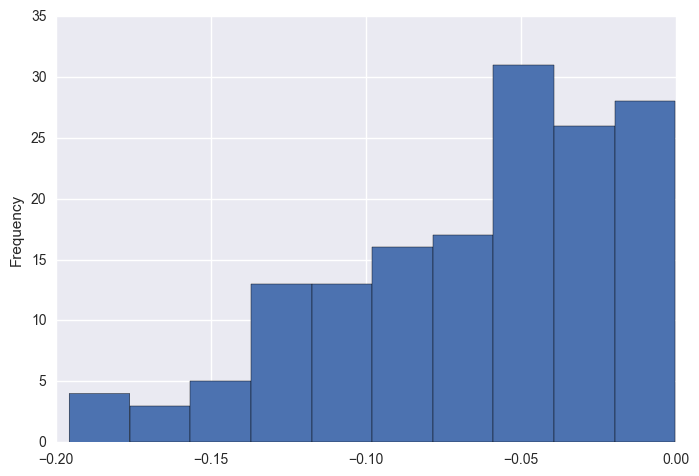

In [14]:
u[u['abs(weight)'] > 0]['weight'].plot.hist()

In [15]:
u.head(n=20)

,gene,abs(weight),weight
1776,Protein-disulfide isomerase,0.195800,-0.195800
2623,bacterial peptide chain release factor 1 (bRF-1),0.193264,-0.193264
1807,Putative mono-oxygenase ydhR,0.181711,-0.181711
1913,Right handed beta helix region,0.178729,-0.178729
1688,Predicted glycosyltransferases,0.168887,-0.168887
3564,nitric oxide reductase subunit C,0.164595,-0.164595
4136,soluble methane monooxygenase reductase apopr...,0.158424,-0.158424
3923,"putative quinone oxidoreductase, YhdH/YhfP fa...",0.154480,-0.154480
4170,sulfate adenylyltransferase subunit 2 (EC 2.7...,0.150052,-0.150052
1939,SRSO17 transposase,0.148082,-0.148082


In [16]:
v = cca.sorted_weights(vector='v')
v.head(n=20)

,gene,abs(weight),weight
4552,Uncharacterized membrane protein YfhO,0.145618,-0.145618
7757,precorrin-6A reductase,0.142571,-0.142571
692,"Acetyl-CoA carboxylase, carboxyltransferase c...",0.136985,-0.136985
4633,Uncharacterized protein involved in exopolysa...,0.129443,-0.129443
5117,amylovoran biosynthesis glycosyltransferase AmsB,0.127814,-0.127814
1909,Glycine cleavage system T protein (aminomethy...,0.125660,-0.125660
1588,"Ectoine hydroxylase-related dioxygenase, phyt...",0.125171,-0.125171
5869,dimethylhistidine N-methyltransferase,0.124951,-0.124951
2730,N-hydroxyarylamine O-acetyltransferase,0.116586,-0.116586
583,"ATP-, maltotriose- and DNA-dependent transcri...",0.111049,-0.111049


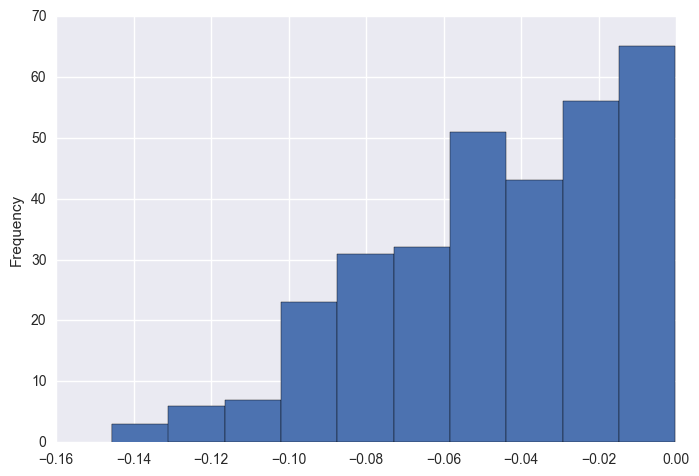

In [17]:
v[v['abs(weight)'] > 0]['weight'].plot.hist()